The following section presents the data cleaning process.

First, we read the data and stored it in a DataFrame.

In [130]:
import pandas as pd

df = pd.read_csv(r'/Volumes/MASTER/Year1/ML/student_lifestyle_dataset..csv')
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,Gender,Grades
0,1,6.9,3.8,8.7,2.8,1.8,Moderate,Male,7.48
1,2,5.3,3.5,8.0,4.2,3.0,Low,Female,6.88
2,3,5.1,3.9,9.2,1.2,4.6,Low,Male,6.68
3,4,6.5,2.1,7.2,1.7,6.5,Moderate,Male,7.20
4,5,8.1,0.6,6.5,2.2,6.6,High,Male,8.78


We checked the data type for each column.

In [131]:
df.dtypes

Student_ID                           int64
Study_Hours_Per_Day                float64
Extracurricular_Hours_Per_Day      float64
Sleep_Hours_Per_Day                float64
Social_Hours_Per_Day               float64
Physical_Activity_Hours_Per_Day    float64
Stress_Level                        object
Gender                              object
Grades                             float64
dtype: object

We checked for any NaN values.

In [132]:
rows_with_nan = df[df.isna().any(axis=1)]
len(rows_with_nan)

0

As Student ID does not bring any insight into the analysis, we decided to drop the column.

In [133]:
df = df.drop(['Student_ID'], axis=1)
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,Gender,Grades
0,6.9,3.8,8.7,2.8,1.8,Moderate,Male,7.48
1,5.3,3.5,8.0,4.2,3.0,Low,Female,6.88
2,5.1,3.9,9.2,1.2,4.6,Low,Male,6.68
3,6.5,2.1,7.2,1.7,6.5,Moderate,Male,7.20
4,8.1,0.6,6.5,2.2,6.6,High,Male,8.78


Since the hours are recorded per day, we did a check to make sure the hours add up to 24 hours.

First, we computed the sum of the columns representing hours data for each row.

In [134]:
import numpy as np

hour_sum = sum([df['Study_Hours_Per_Day'], df['Extracurricular_Hours_Per_Day'], df['Sleep_Hours_Per_Day'], df['Social_Hours_Per_Day'], df['Physical_Activity_Hours_Per_Day']])

Then we checked if the sum on each row is equal to 24. We used the method isclose to compare to 24, since the hours are represented as floating points.

In [135]:
rows_where_hours_sum_is_not_24 = df[~np.isclose(hour_sum, 24)]

We observed there are no rows that do not respect the 24 hours sum.

In [136]:
len(rows_where_hours_sum_is_not_24)

0

We then checked the grading scale by selecting the minimum and maximum grades. We deduced that the scale was up to 10, with only passing grades being recorded (above 5).

In [137]:
print(min(df['Grades']))
print(max(df['Grades']))

5.6
10.0


We used the describe functionality of DataFrames to get an overview of the column information. We observed that the minimums and maximums correlate with values that we would expect to have for hours or grades.

In [138]:
df.describe()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Grades
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,7.475800,1.990100,7.501250,2.704550,4.32830,7.789825
std,1.423888,1.155855,1.460949,1.688514,2.51411,0.746777
min,5.000000,0.000000,5.000000,0.000000,0.00000,5.600000
25%,6.300000,1.000000,6.200000,1.200000,2.40000,7.250000
50%,7.400000,2.000000,7.500000,2.600000,4.10000,7.780000
75%,8.700000,3.000000,8.800000,4.100000,6.10000,8.320000
max,10.000000,4.000000,10.000000,6.000000,13.00000,10.000000


We continued by analysing the categorical columns, exploring which categories were present in the dataset.

In [139]:
stress_level_categories = df['Stress_Level'].unique()
print(stress_level_categories)

gender_categories = df['Gender'].unique()
print(gender_categories)

['Moderate' 'Low' 'High']
['Male' 'Female']


Then we converted the categorical values to numerical. For gender we used the LabelEncoder from sklearn.preprocessing. For stress level we thought an intuitive approach would be to assign the values in the order of magnitude, so Low - 0, Moderate - 1 and High - 2.

In [141]:
import sklearn

label_encoder_gender = sklearn.preprocessing.LabelEncoder()
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])

mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
df['Stress_Level'] = df['Stress_Level'].replace(mapping)

df.head()


,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,Gender,Grades
0,6.9,3.8,8.7,2.8,1.8,1,1,7.48
1,5.3,3.5,8.0,4.2,3.0,0,0,6.88
2,5.1,3.9,9.2,1.2,4.6,0,1,6.68
3,6.5,2.1,7.2,1.7,6.5,1,1,7.20
4,8.1,0.6,6.5,2.2,6.6,2,1,8.78


Finally, we stored the hours data (so only the Study_Hours_Per_Day, Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day, Social_Hours_Per_Day, Physical_Activity_Hours_Per_Day columns) inside a numpy matrix X with 2000 rows and 5 columns. We chose the y vector as the Stress_Level column.

In [168]:
X = df[['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']]
print('X shape:', X.shape)

y = df['Stress_Level']
print('y shape:', y.shape)

X shape: (2000, 5)
y shape: (2000,)


This concluded the data cleaning step, in the following section we will describe the process to visualise data and apply PCA to our dataset.

We plotted a matrix scatter plot for all attributes in X, coloring based on the Stress Level.

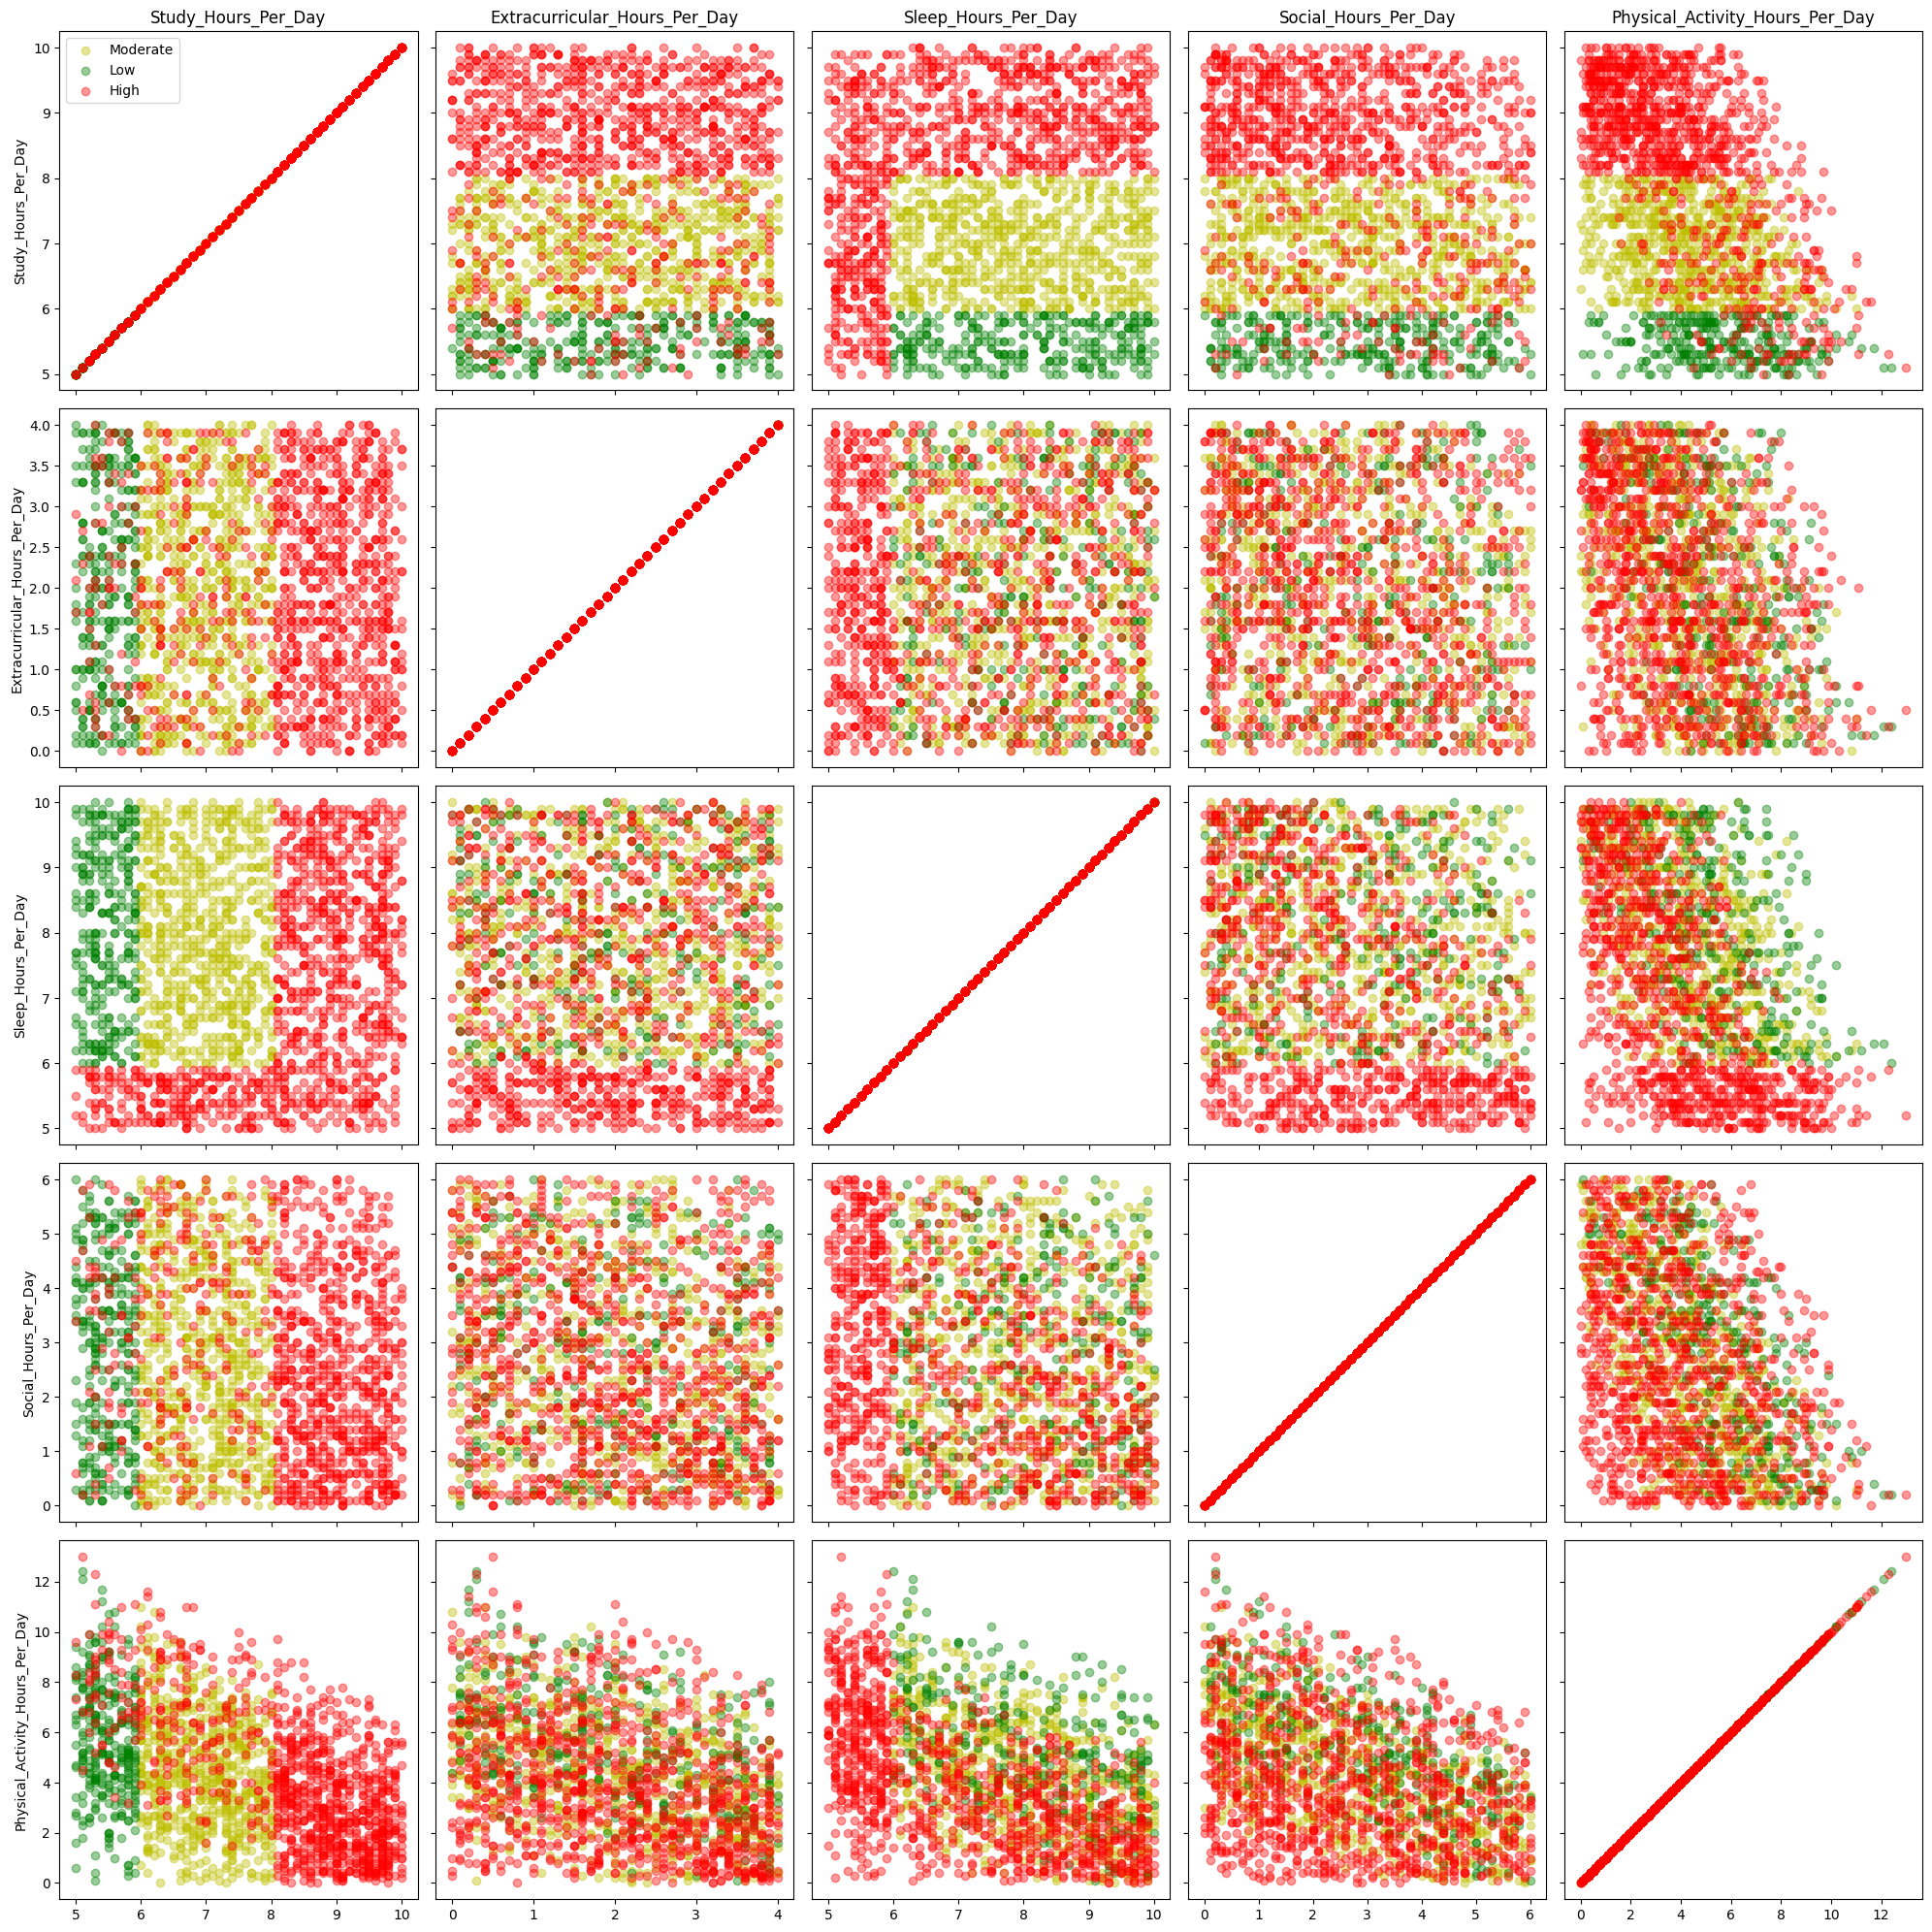

In [191]:
import matplotlib.pyplot as plt

number_of_columns = X.shape[1]

color_map = {0: 'g', 1: 'y', 2: 'r'}

fig, axs = plt.subplots(number_of_columns, number_of_columns, figsize=(20, 20), sharex='col', sharey='row')

for i in range(number_of_columns):
    for j in range(number_of_columns):
        for color in df['Stress_Level'].unique():
            mask = (df['Stress_Level'] == color)
            axs[i, j].scatter(
                x=X[mask].iloc[:, j],
                y=X[mask].iloc[:, i],
                # Get the label from the mapping above of {'Low': 0, 'Moderate': 1, 'High': 2}
                label=[key for key, value in mapping.items() if value == color][0],
                alpha = 0.4,
                color=color_map.get(color)
        )

for col in range(number_of_columns):
    axs[0, col].set_title(X.columns[col])
    axs[col, 0].set_ylabel(X.columns[col])

axs[0,0].legend(loc='upper left')
plt.tight_layout(pad=1.)
plt.show()

We computed the correlation matrix of X's attributes.

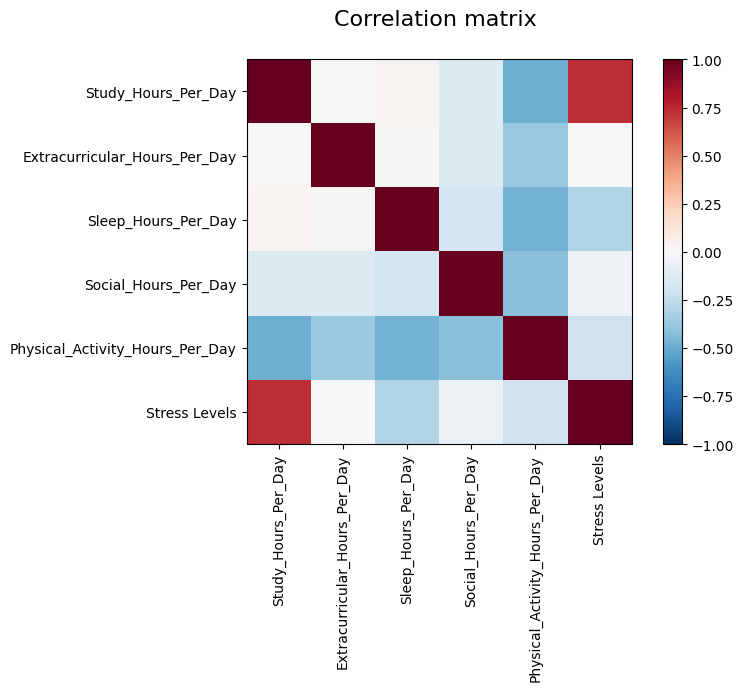

In [192]:
df_tilde = pd.concat([X, y], axis=1)
# Compute the correlation matrix
correlation_matrix = df_tilde.corr()

# Plot the correlation matrix
fig = plt.figure(figsize=(8, 5))
fig.suptitle('Correlation matrix', fontsize=16)
# Plot correlation matrix and set colorbar min and max to -1 and 1 since thats the range of the correlation coefficients
plt.imshow(correlation_matrix, cmap='RdBu_r', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(ticks=np.arange(correlation_matrix.shape[1]), labels=list(X.columns) + ["Stress Levels"], rotation=90)
plt.yticks(ticks=np.arange(correlation_matrix.shape[1]), labels=list(X.columns) + ["Stress Levels"])
plt.grid(False)
plt.show()

Then we computed the PCA and plotted the percent of variance explained by the principal components as well as the cumulative percentage of variance explained.

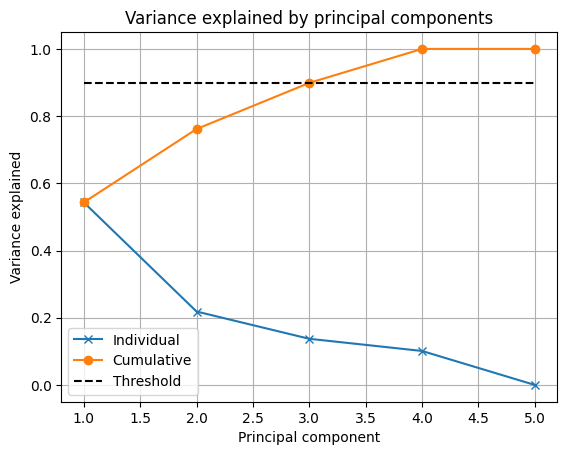

In [178]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
# Extract the principle components into the matrix V transposed
V = pca.components_.T
# Compute fraction of variance explained
rho = pca.explained_variance_ratio_

# 90% threshold for variance explained
threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()